In [ ]:
pip install networkx

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter

**Importing nodes and edges lists**
  
  Here we are using the full graph 




In [ ]:
nodes_df = pd.read_csv('nodes_hate_com.csv', low_memory=False)
edges_df = pd.read_csv('edges_hate_com.csv', low_memory=False)

**Creating NetworkX Graph object**

In [ ]:
#Creating a NetworkX Graph
G = nx.Graph()

In [ ]:
nodes_df

,Id,Label
0,diro,diro
1,gente,gente
2,guerra,guerra
3,portato,portato
4,casa,casa
...,...,...
11079,linguacciuto,linguacciuto
11080,morono,morono
11081,elettrizzare,elettrizzare
11082,#dalleparoleaifatti,#dalleparoleaifatti


In [ ]:
#Ignore if your CSV is doesn't have Id column
nodes_df = nodes_df.drop(columns = 'Id')

In [ ]:
edges_df

,source,target,weight
0,dire,gente,60
1,diro,guerra,6
2,diro,portato,2
3,diro,casa,13
4,diro,rimpatriare,1
...,...,...,...
378019,causale,rimpatriamoli,1
378020,handicappare,linguacciuto,1
378021,elettrizzare,#dalleparoleaifatti,1
378022,elettrizzare,#taser,1


In [25]:
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])	

data = nodes_df.set_index('Label').to_dict('index').items()

G.add_nodes_from(data)
print(G.nodes(data=True))
print(G.edges(data=True))

[('dire', {}), ('gente', {}), ('diro', {}), ('guerra', {}), ('portato', {}), ('casa', {}), ('rimpatriare', {}), ('senatore', {}), ('iniziare', {}), ('verita', {}), ('islam', {}), ('pacificare', {}), ('vertice', {}), ('chiesa', {}), ('cattolico', {}), ('pensare', {}), ('diversamente', {}), ('paura', {}), ('parlare', {}), ('terrorismo', {}), ('matrice', {}), ('islamico', {}), ('bene', {}), ('donare', {}), ('giornata', {}), ('assistere', {}), ('bisognare', {}), ('soldo', {}), ('lavorare', {}), ('volontariato', {}), ('incassare', {}), ('euro', {}), ('civati', {}), ('decennio', {}), ('scienziato', {}), ('lanciare', {}), ('allarme', {}), ('clima', {}), ('bucare', {}), ('ozono', {}), ('politico', {}), ('calcolare', {}), ('giovane', {}), ('mobilitare', {}), ('ascoltare', {}), ('linguaggio', {}), ('ceto', {}), ('distare', {}), ('anno', {}), ('lucere', {}), ('problema', {}), ('capacitare', {}), ('comunicare', {}), ('restare', {}), ('cavalcare', {}), ('salire', {}), ('carro', {}), ('trainare', {}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Printing some Graph information

In [26]:
#Checking if the edges and nodes were added successfully
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 11084
Number of edges: 378023
Average degree:  68.2106


###Some Network Statistics below can be done using Gephi while others are more flexible to try in Python

####**PART ONE:** Metrics Related to the network structure (Density, Transitivity)



**DENSITY**

In [27]:
#Overall Density of the network
density = nx.density(G)
print("Network density:", density)

Network density: 0.006154522584144381


This **Density** value just means that our network is weakly connected, this is predictable since we are dealing with a huge network.

**TRANSITIVITY**

In [28]:
#Overall Density of the network
transitivity = nx.transitivity(G)
print("Network transitivity:", transitivity)

Network transitivity: 0.20110974707740045


**Transitivity** is just a way to measure triadic closure, teh value we get tells us how the nodes are interconnected. This suggest that we should look more into the importance of each node(degrees, centrality, page rank etc..) using the metrics in PART 2. 

####**PART TWO:** Metrics Related to the importance of each node
In this section we add new attributes to each node depending on its centrality, degree...

**DEGREES** : Create **degrees dictionary**, mapping each word to their respective degrees. 

In [29]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
#It is important to set degree as an attribute of node alongside the other attributes 

In [30]:
#Sorting in desceding order (this will be important if we want to use nodes removal)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [31]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('italia', 2766)
('italiano', 2749)
('anno', 2406)
('fare', 2348)
('potere', 2209)
('sempre', 2205)
('paese', 2110)
('quando', 2038)
('andare', 1928)
('parlare', 1918)
('salvini', 1904)
('casa', 1900)
('politico', 1875)
('dire', 1839)
('persona', 1781)
('governare', 1780)
('partire', 1765)
('lavorare', 1739)
('mettere', 1696)
('bene', 1598)


## Degree Distribution plots ( LOG SCALE)

In [34]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

We see what hubs we have: 'fare' ; 'anno' ; 'politico'...

Creating histogram...


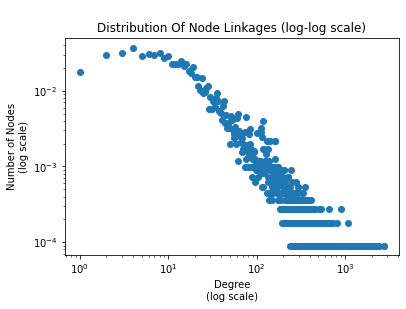

In [37]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, aux_y, 'o')

**Betweeness Centrality Dictionary**

  

It is quite informative to see what is the most central node in the network. This measure is more relevant because it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node.

TAKES LOTS OF TIME TO RUN, calculating every possible shortest path in the network is exhaustive.

In [ ]:
#Inspecting the centrality of each node --> important if we want to implement nodes removal
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Well, it is very expected that nodes with high degrees would have high centrality but it would be more interesting to see if there are any noes with low degrees and high centrality. Below we append both attributes to investigate this hypothesis.

In [ ]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree,
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

###PART 3: Nodes Removal 
In this section we try to remove a set of nodes one by one to see how it affects the robustness of the network.

In [39]:
#Here we select the nodes of hate comments subgraph and sort them by degree
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree_G= sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
selected_nodes = list(sorted_degree_G)[:5] #20 nodes to be removed just for simplicity you can choose any number
#TOP 20 nodes to remove
nodes_removed = []
for i,v in enumerate(selected_nodes): 
  nodes_removed.append(selected_nodes[i][0])

In [ ]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
G1 = G.copy()
list_transitivity = [] #We can check density too
#list_degree = []
#diam_list =[]
nodes_rem = []
for i, node in enumerate(nodes_removed):
  G1.remove_node(node)
  #diam_list.append(nx.diameter(G1.to_undirected()) ) #returns an error 
  list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
  nodes_rem.append(i+1)

In [ ]:
plt.plot(nodes_rem, list_transitivity, 'r-')
#plt.plot(nodes_removed, diam_list , 'b-')
plt.ylabel("transitivity")
plt.xlabel("Removed nodes")
plt.show()

**The above code can be repeated on another subset of data**